In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in csv files
mouse_path = "Resources/mouse_metadata.csv"
mouse = pd.read_csv(mouse_path)

study_path = "Resources/study_results.csv"
study = pd.read_csv(study_path)

In [3]:
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


## Data Cleaning

In [5]:
# Merge the datasets
merge_df= mouse.merge(study, on= "Mouse ID", how= "left")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Find the duplicate mouse (ID and Timepoint)
duplicate= merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#Drop duplicate mouse
clean_df= merge_df[merge_df['Mouse ID'] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Tumor Volume by Drug Regimen Analysis

In [8]:
#Summary Statistics
# drugs= clean_df.groupby('Drug Regimen')
# drugs['Tumor Volume (mm3)'].describe()

drug_group_df = clean_df.groupby(["Drug Regimen"])
a = round(drug_group_df['Tumor Volume (mm3)'].mean(), 3)
b = round(drug_group_df['Tumor Volume (mm3)'].median(), 3)
c = round(drug_group_df['Tumor Volume (mm3)'].var(), 3)
d = round(drug_group_df['Tumor Volume (mm3)'].std(), 3)
e = round(drug_group_df['Tumor Volume (mm3)'].sem(), 3)

sum_stats = pd.DataFrame({'Mean': a, 'Median': b, 'Variance': c, 'SD': d, 'SEM': e})
sum_stats

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


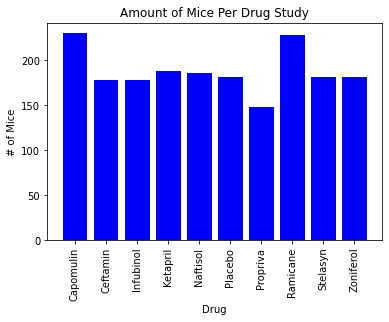

In [9]:
# Create a barchart for the # of mice per drug
#Matplotlib barchart method
measures= clean_df["Drug Regimen"].count()
measures
drug_name= ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol',
            'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
y_axis= [230,178,178,188,186,181,148,228,181,182]
x_axis= np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color="b", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name, rotation='vertical')

plt.title("Amount of Mice Per Drug Study")
plt.xlabel("Drug")
plt.ylabel("# of Mice")

plt.show()

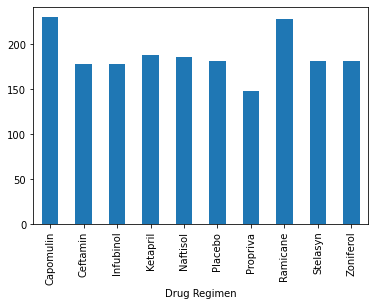

In [10]:
#Pandas barchart method
measure_df= drug_group_df['Mouse ID'].count()
measure_df.plot(kind='bar')
plt.show()

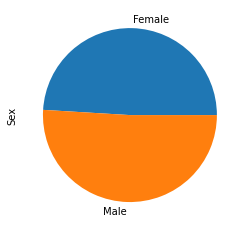

In [15]:
# Pie chart Panadas method
sex_df= clean_df.groupby('Sex')
sex_df= sex_df['Sex'].count()
sex_df.plot(kind='pie')
plt.show()

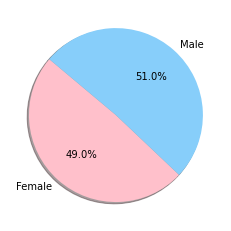

In [18]:
# Pie chart Matplolib method
# Labels for the sections of our pie chart
labels = ['Female', 'Male']

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [34]:
cap= clean_df[(clean_df['Drug Regimen']== "Capomulin")]
ram= clean_df[(clean_df['Drug Regimen']== "Ramicane")] 
infu= clean_df[(clean_df['Drug Regimen']== "Infubinol")] 
ceft= clean_df[(clean_df['Drug Regimen']== "Ceftamin")]
ceft['Tumor Volume (mm3)'].describe()
print("Capomulin:")
print("Q1: 37.7")
print("Q2: 41.6")
print("Q3: 45")
print("IQR: 7.3")

print("Ramicane:")
print("Q1: 36.7")
print("Q2: 40.7")
print("Q3: 45")
print("IQR: 8.3")

print("Infubinol:")
print("Q1: 47.3")
print("Q2: 51.8")
print("Q3: 57.3")
print("IQR: 10")

print("Ceftamin:")
print("Q1: 47.2")
print("Q2: 51.8")
print("Q3: 56.8")
print("IQR: 9.6")

Capomulin:
Q1: 37.7
Q2: 41.6
Q3: 45
IQR: 7.3
Ramicane:
Q1: 36.7
Q2: 40.7
Q3: 45
IQR: 8.3
Infubinol:
Q1: 47.3
Q2: 51.8
Q3: 57.3
IQR: 10
Ceftamin:
Q1: 47.2
Q2: 51.8
Q3: 56.8
IQR: 9.6


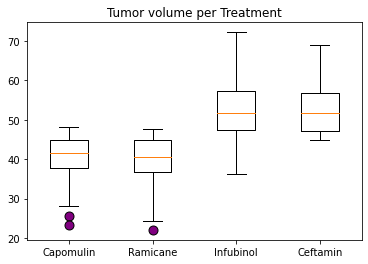

In [44]:
# Box Plots
data = [cap['Tumor Volume (mm3)'], ram['Tumor Volume (mm3)'], infu['Tumor Volume (mm3)'],
        ceft['Tumor Volume (mm3)']]
fig7, ax7 = plt.subplots()
ax7.set_title('Tumor volume per Treatment')
flierprops = dict(marker='o', markerfacecolor='purple', markersize=9,
                  linestyle='none')
ax7.boxplot(data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

In [46]:
cap_line= cap[cap['Mouse ID'] == "s185"]
cap_line

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


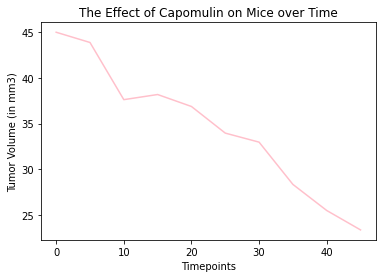

In [49]:
# Create a plot of tumor volume vs. time point
time = [0,5,10,15,20,25,30,35,40,45]
tumor= [45.0, 43.87849569, 37.61494768, 38.17723195, 36.86687576, 
        33.94994037, 32.95967078, 28.32853059, 25.47214326, 23.34359787]

# Plot our line that will be used to show tomor volume for mouse s185
plt.plot(time, tumor, color="pink")


plt.title('The Effect of Capomulin on Mice over Time')
plt.xlabel("Timepoints")
# plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.ylabel("Tumor Volume (in mm3)")

# Print our chart to the screen
plt.show()

In [53]:
# Scatterplot of mouse weight vs average tumor volume for cap


# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
# plt.scatter(year,violent_crime_rate)
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate')
# plt.show()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [ ]:
# Linear regression model for weight vs average tumor volume for cap


# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
# plt.scatter(year,violent_crime_rate)
# plt.plot(year,vc_fit,"--")
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate')
# plt.show()